<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/GANexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def calculate(x):
  return x*x

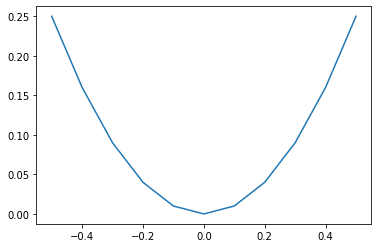

In [7]:
from matplotlib import pyplot
import numpy as np


inputs = [i for i in np.arange(-0.5,0.6, .1)]

# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)

## generate a uniformly random values between 0-1

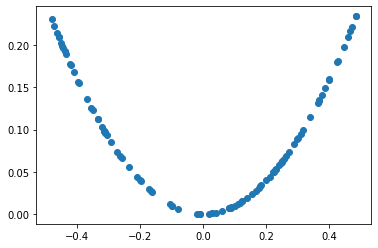

In [8]:
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

# generate randoms sample from x^2
def generate_samples(n=100):
  # generate random inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  # generate output X^2 (quadratic)
  X2 = X1*X1
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  return hstack((X1, X2))

# generate samples
data = generate_samples()
#plot_samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

## Define a Discriminator Model


In [9]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


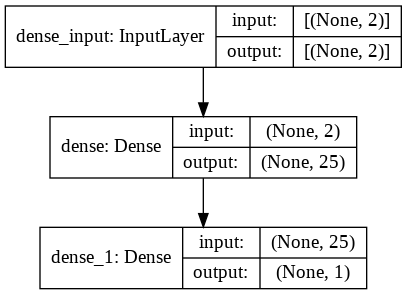

In [10]:
# define the discrimator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# define the discriminator model
model = define_discriminator()
# summary the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)


## Generate the model

In [17]:
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [13]:
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

In [15]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

In [18]:
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.203125 0.578125
1 0.203125 0.703125
2 0.15625 0.515625
3 0.125 0.5625
4 0.21875 0.671875
5 0.109375 0.59375
6 0.234375 0.640625
7 0.203125 0.671875
8 0.1875 0.6875
9 0.1875 0.5625
10 0.171875 0.453125
11 0.1875 0.578125
12 0.171875 0.640625
13 0.265625 0.671875
14 0.171875 0.640625
15 0.234375 0.703125
16 0.265625 0.65625
17 0.21875 0.65625
18 0.21875 0.671875
19 0.296875 0.703125
20 0.28125 0.6875
21 0.25 0.78125
22 0.25 0.671875
23 0.15625 0.75
24 0.390625 0.75
25 0.28125 0.78125
26 0.265625 0.765625
27 0.34375 0.75
28 0.359375 0.6875
29 0.203125 0.6875
30 0.296875 0.671875
31 0.296875 0.703125
32 0.1875 0.8125
33 0.296875 0.78125
34 0.265625 0.703125
35 0.234375 0.796875
36 0.296875 0.75
37 0.3125 0.8125
38 0.296875 0.6875
39 0.234375 0.828125
40 0.359375 0.6875
41 0.3125 0.78125
42 0.359375 0.828125
43 0.3125 0.796875
44 0.296875 0.765625
45 0.375 0.765625
46 0.3125 0.75
47 0.4375 0.734375
48 0.4375 0.8125
49 0.359375 0.75
50 0.375 0.8125
51 0.421875 0.8125
52 0.3125 0.859375
5

## Define a Generator Model

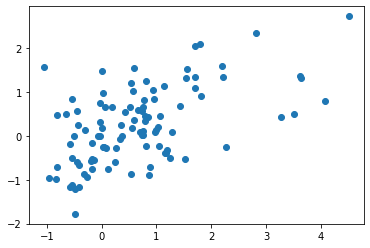

In [19]:
# define and use the generator model
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input
 
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()
 
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

Training the Generator Model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


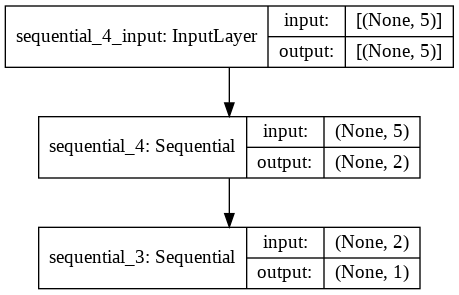

In [10]:

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [23]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

Evaluating the Performance of the GAN

In [1]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [2]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [3]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

In [4]:
# plot real and fake points
def summarize_performance(generator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [5]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [6]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

1999 0.47999998927116394 0.46000000834465027


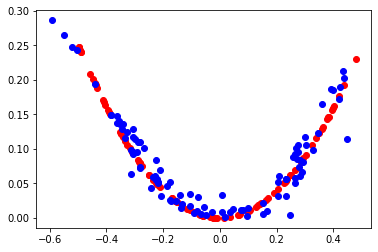

3999 0.46000000834465027 0.6000000238418579


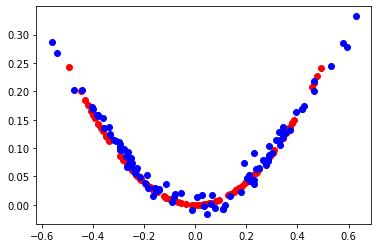

5999 0.7099999785423279 0.3499999940395355


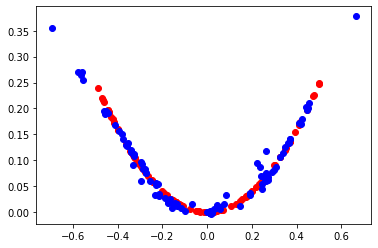

7999 0.5299999713897705 0.44999998807907104


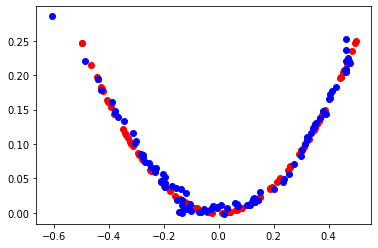

9999 0.36000001430511475 0.6800000071525574


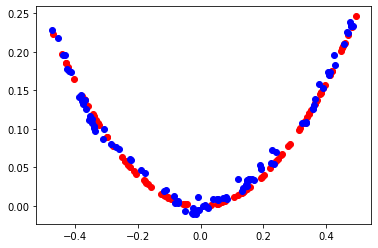

In [11]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)


# Example from Dive in Deep Learning

### Generate some 'Real' Data

In [13]:
!pip install mxnet

     |████████████████████████████████| 46.9MB 65kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [15]:
!pip install d2l

     |████████████████████████████████| 92kB 5.7MB/s 


In [16]:
%matplotlib inline
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [17]:
X = np.random.normal(0.0, 1, (1000,2))
A = np.array([[1,2], [-0.1, 0.5]])
b = np.array([1,2])
data= np.dot(X,A) + b

The covariance matrix is
[[1.01 1.95]
 [1.95 4.25]]


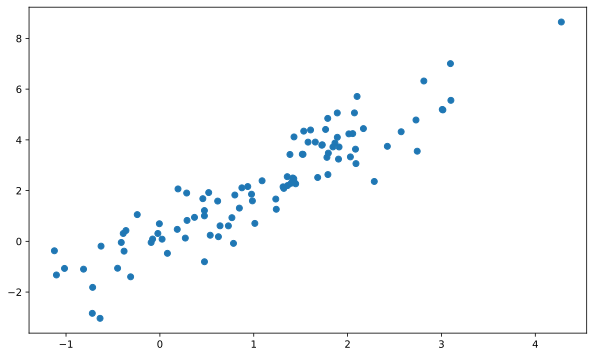

In [19]:
d2l.set_figsize((10, 6))
d2l.plt.scatter(data[:100,(0)].asnumpy(), data[:100, (1)].asnumpy())
print(f'The covariance matrix is\n{np.dot(A.T, A)}')

In [24]:
data[:10,1]

array([ 7.005952  ,  3.7899098 ,  4.2366624 ,  4.4443636 ,  5.1990156 ,
        0.30955267, -1.8150303 , -0.08058381,  3.4294872 , -0.3729105 ])

In [60]:
batch_size = 8
data_iter = d2l.load_array((data,), batch_size)

### Generator

In [40]:
net_G = nn.Sequential()
net_G.add(nn.Dense(2))

In [ ]:
Z = np.random.normal(0, 1, size=(100, latent_dim))
fake_X = net_G(Z)
fake_X.asnumpy()

### Discriminator
Use a MLP with 3 Layers to make things a bit more interesting

In [43]:
net_D = nn.Sequential()
net_D.add(nn.Dense(5, activation='relu'), nn.Dense(3, activation='relu'),nn.Dense(1))

### Training

In [27]:
def update_D(X, Z, net_D, net_G, loss, trainer_D):
  """Update discriminator."""
  batch_size = X.shape[0]
  ones = np.ones((batch_size,), ctx=X.ctx)
  zeros = np.zeros((batch_size,), ctx=X.ctx)
  with autograd.record():
    real_Y = net_D(X)
    fake_X = net_G(Z)
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones) + loss(fake_Y, zeros))/2
  loss_D.backward()
  trainer_D.step(batch_size)
  return float(loss_D.sum())

In [45]:
X.shape

(1000, 2)

In [28]:
def update_G(Z, net_D, net_G, loss, trainer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = np.ones((batch_size,), ctx=Z.ctx)
    with autograd.record():
        # We could reuse `fake_X` from `update_D` to save computation
        fake_X = net_G(Z)
        # Recomputing `fake_Y` is needed since `net_D` is changed
        fake_Y = net_D(fake_X)
        loss_G = loss(fake_Y, ones)
    loss_G.backward()
    trainer_G.step(batch_size)
    return float(loss_G.sum())

In [37]:
def train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G, latent_dim, data):
    loss = gluon.loss.SigmoidBCELoss()
    net_D.initialize(init=init.Normal(0.02), force_reinit=True)
    net_G.initialize(init=init.Normal(0.02), force_reinit=True)
    trainer_D = gluon.Trainer(net_D.collect_params(), 'adam',
                              {'learning_rate': lr_D})
    trainer_G = gluon.Trainer(net_G.collect_params(), 'adam',
                              {'learning_rate': lr_G})
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs], nrows=2, figsize=(5, 5),
                            legend=['discriminator', 'generator'])
    animator.fig.subplots_adjust(hspace=0.3)
    for epoch in range(num_epochs):
        # Train one epoch
        timer = d2l.Timer()
        metric = d2l.Accumulator(3)  # loss_D, loss_G, num_examples
        for X in data_iter:
            batch_size = X.shape[0]
            Z = np.random.normal(0, 1, size=(batch_size, latent_dim))
            metric.add(update_D(X, Z, net_D, net_G, loss, trainer_D),
                       update_G(Z, net_D, net_G, loss, trainer_G), batch_size)
        # Visualize generated examples
        Z = np.random.normal(0, 1, size=(100, latent_dim))
        fake_X = net_G(Z).asnumpy()
        animator.axes[1].cla()
        animator.axes[1].scatter(data[:, 0], data[:, 1])
        animator.axes[1].scatter(fake_X[:, 0], fake_X[:, 1])
        animator.axes[1].legend(['real', 'generated'])
        # Show the losses
        loss_D, loss_G = metric[0] / metric[2], metric[1] / metric[2]
        animator.add(epoch + 1, (loss_D, loss_G))
    print(f'loss_D {loss_D:.3f}, loss_G {loss_G:.3f}, '
          f'{metric[2] / timer.stop():.1f} examples/sec')

loss_D 0.693, loss_G 0.693, 620.4 examples/sec


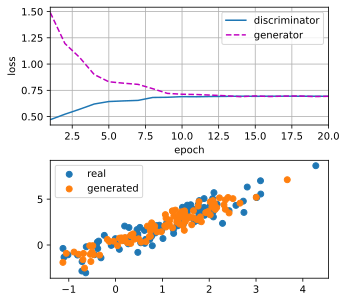

In [61]:
lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005,2, 20
train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G, latent_dim,
      data[:100].asnumpy())